<a href="https://colab.research.google.com/github/hemilygomes/portifolio_DS/blob/main/Consumo_de_cerveja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Regressão Linear**

##**Otimizando a venda de cervejas no Carnaval 2022 (se ele existisse)**

***Motivação:*** A cerveja é uma das bebidas mais democráticas e consumidas do mundo. Não sem razão, é perfeito para quase todas as situações, desde happy hour até grandes festas de casamento. Se você só pensar nisso, você já sente vontade de tomar uma cerveja, você não está sozinho. A verdade é que em todo o mundo, milhares de pessoas consomem a bebida regularmente e também em diferentes situações. Mas você já parou para pensar em quais países são os que mais consomem cerveja no mundo? A primeira que lhe veio à cabeça foi a Alemanha? Bem, saiba que não é assim. A resposta a essa pergunta é retumbante: a República Tcheca. Segundo pesquisa da empresa japonesa de bebidas Kirin, o país lidera a tabela de consumo de cerveja per capita por 23 anos consecutivos. Em 2015, o ano mais recente para o qual existem estatísticas disponíveis, os tchecos beberam 142,4 litros por pessoa. Isso é o equivalente a 250 canecas — ou uma a cada 35 horas. Mas, dado que é improvável que os menores contribuam para esse número, é seguro supor que o bebedor médio de cerveja provavelmente bebe um pouco mais. Áustria e Alemanha vêm em terceiro e quarto, Polônia em sexto e Irlanda em sétimo. No entanto, há algumas surpresas. Em segundo lugar estão as Seychelles, uma classificação elevada que atribuímos ao clima quente e ao grande número de turistas.

Coletamos alguns dados de São Paulo — Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos (média) para desenvolver um estudo e precisamos da sua ajuda: Se existisse um carnaval? E eu quisesse escolher o melhor dia para vender cervejas em SP, qual dos dias abaixo você sugeriria e por que?

* 26/02/2022
* 27/02/2022
* 28/02/2022
* 01/03/2022
* 02/03/2022

##**Coleta e Tratamento dos dados**

###Comecemos importando as bibliotecas que serão utilizadas:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

###Importando a base de dados do github e criando o dataframe:

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/hemilygomes/portifolio_DS/main/consumo_cerveja.csv')
df

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###O dataset acima possui alguns dados climáticos de uma determinada região de São Paulo para todos os dias do ano de 2015 e também a informação se o dia em questão é final de semana (1) ou não (0).

###Para começar a tratar o dataframe, vamos excluir as linhas em que todos os valores são do tipo nulo.

In [ ]:
df.dropna(how='all',inplace=True)

In [ ]:
df

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
360,2015-12-27,24,"21,1","28,2","13,6",1.0,32.307
361,2015-12-28,"22,64","21,1","26,7",0,0.0,26.095
362,2015-12-29,"21,68","20,3","24,1","10,3",0.0,22.309
363,2015-12-30,"21,38","19,3","22,4","6,3",0.0,20.467


###A fim de padronizar o dataframe, vamos retirar os espaços dos nomes das colunas e deixar tudo em minúsculo:

In [ ]:
df.columns = df.columns.str.replace(' ', '_') 
df.columns = df.columns.str.lower()

In [ ]:
df

,data,temperatura_media_(c),temperatura_minima_(c),temperatura_maxima_(c),precipitacao_(mm),final_de_semana,consumo_de_cerveja_(litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
360,2015-12-27,24,"21,1","28,2","13,6",1.0,32.307
361,2015-12-28,"22,64","21,1","26,7",0,0.0,26.095
362,2015-12-29,"21,68","20,3","24,1","10,3",0.0,22.309
363,2015-12-30,"21,38","19,3","22,4","6,3",0.0,20.467


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   data                         365 non-null    object 
 1   temperatura_media_(c)        365 non-null    object 
 2   temperatura_minima_(c)       365 non-null    object 
 3   temperatura_maxima_(c)       365 non-null    object 
 4   precipitacao_(mm)            365 non-null    object 
 5   final_de_semana              365 non-null    float64
 6   consumo_de_cerveja_(litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 22.8+ KB


###É possível ver que não há mais valores nulos no dataframe. Porém, algumas colunas que deveriam ser numéricas são do tipo 'object'. Vamos, então, fazer a conversão apropriada. 

###Primeiramente, vamos converter o campo 'Data' para o tipo 'datetime':

In [ ]:
df['data'] = pd.to_datetime(df['data'], format="%Y/%m/%d")

###Os dados de temperatura e de precipitação devem ser convertidos para Float. Ao se tentar fazer isso diretamente, ocorre um erro devido ao separador decimal ser 'vírgula'. Precisamos fazer a troca para 'ponto'.

In [ ]:
df['temperatura_media_(c)'] = df['temperatura_media_(c)'].str.replace(',', '.')
df['temperatura_minima_(c)'] = df['temperatura_minima_(c)'].str.replace(',', '.')
df['temperatura_maxima_(c)'] = df['temperatura_maxima_(c)'].str.replace(',', '.')
df['precipitacao_(mm)'] = df['precipitacao_(mm)'].str.replace(',', '.')

###Em seguida, fazemos a conversão para 'float':

In [ ]:
df.loc[:,'temperatura_media_(c)':'precipitacao_(mm)'] = df.loc[:,'temperatura_media_(c)':'precipitacao_(mm)'].astype(float, errors = 'raise')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   data                         365 non-null    datetime64[ns]
 1   temperatura_media_(c)        365 non-null    float64       
 2   temperatura_minima_(c)       365 non-null    float64       
 3   temperatura_maxima_(c)       365 non-null    float64       
 4   precipitacao_(mm)            365 non-null    float64       
 5   final_de_semana              365 non-null    float64       
 6   consumo_de_cerveja_(litros)  365 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 22.8 KB


###Notemos que os tipos de dados agora estão corretos e o dataframe após o tratamento é o seguinte:

In [ ]:
df

,data,temperatura_media_(c),temperatura_minima_(c),temperatura_maxima_(c),precipitacao_(mm),final_de_semana,consumo_de_cerveja_(litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900
...,...,...,...,...,...,...,...
360,2015-12-27,24.00,21.1,28.2,13.6,1.0,32.307
361,2015-12-28,22.64,21.1,26.7,0.0,0.0,26.095
362,2015-12-29,21.68,20.3,24.1,10.3,0.0,22.309
363,2015-12-30,21.38,19.3,22.4,6.3,0.0,20.467


##**Analisando a correlação entre as variáveis**

###Matriz Correlação:

In [ ]:
df.corr()

,temperatura_media_(c),temperatura_minima_(c),temperatura_maxima_(c),precipitacao_(mm),final_de_semana,consumo_de_cerveja_(litros)
temperatura_media_(c),1.000000,0.862752,0.922513,0.024416,-0.050803,0.574615
temperatura_minima_(c),0.862752,1.000000,0.672929,0.098625,-0.059534,0.392509
temperatura_maxima_(c),0.922513,0.672929,1.000000,-0.049305,-0.040258,0.642672
precipitacao_(mm),0.024416,0.098625,-0.049305,1.000000,0.001587,-0.193784
final_de_semana,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.505981
consumo_de_cerveja_(litros),0.574615,0.392509,0.642672,-0.193784,0.505981,1.000000


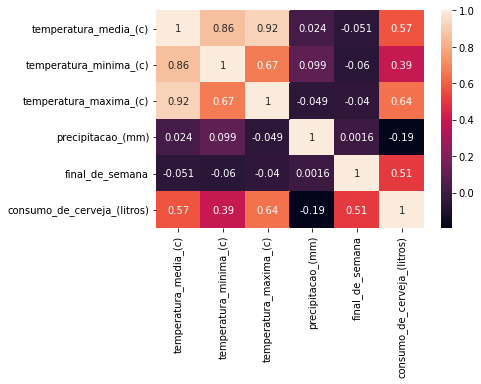

In [ ]:
sns.heatmap(df.corr(),annot=True)

###A maior correlação se dá entre Consumo X Temperatura_Maxima: 0.64
###Vejamos graficamente:

In [ ]:
x=df['temperatura_maxima_(c)']
y=df['consumo_de_cerveja_(litros)']

###Sempre colocando as variáveis preditoras na abcissa (x) e a variável alvo que se quer prever no eixo das ordenadas (y).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


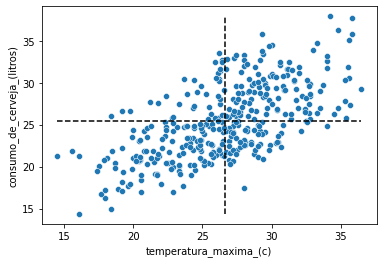

In [ ]:
ax=sns.scatterplot(x,y)
ax.hlines(y=y.mean(),xmin=x.min(),xmax=x.max(),linestyles='dashed')
ax.vlines(x=x.mean(),ymin=y.min(),ymax=y.max(),linestyles='dashed')

###Linhas vertical e horizontal na média dos valores.

###Nota-se de fato uma correlação positiva entre as variáveis.

##**Regressão Linear**

In [ ]:
lm = LinearRegression()

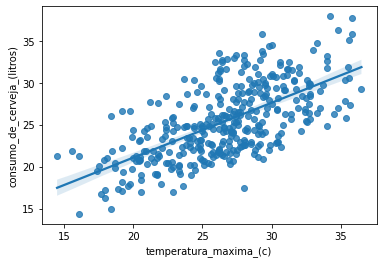

In [ ]:
sns.regplot(x='temperatura_maxima_(c)',y='consumo_de_cerveja_(litros)', data=df)
plt.show()

In [ ]:
x=df[['temperatura_maxima_(c)']]
y=df[['consumo_de_cerveja_(litros)']]

In [ ]:
lm.fit(x,y)

LinearRegression()

In [ ]:
y_hat = lm.predict(x)

###Graficamente, podemos visualisar a relação entre os valores reais e os previstos:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


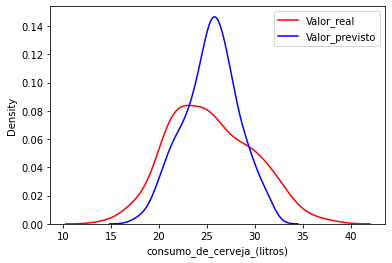

In [ ]:
ax1 = sns.distplot(df['consumo_de_cerveja_(litros)'],hist=False,color='r',label='Valor_real')
sns.distplot(y_hat,hist=False,ax=ax1,color='b',label='Valor_previsto')
plt.legend()
plt.show()

###À primeira vista, já podemos afirmar que o modelo não está muito bom. Há uma distância considerável entre os valores reais e os valores previstos.
###Vamos obter as métricas do modelo:

In [ ]:
print('R2: ', r2_score(y,y_hat))
print('MAE: ', mean_absolute_error(y,y_hat))
print('RMSE: ',np.sqrt(mean_squared_error(y,y_hat)))

R2:  0.413027909953363
MAE:  2.7642672738837044
RMSE:  3.3657436535799166


###Como era de se esperar, o score R^2 não é alto. Essa métrica representa a porcentagem da variação dos dados (variável dependente) que é explicada pelo modelo de regressão.

###As métricas MAE e RMSE expressam o erro médio dos valores previstos pelo modelo. 

###RMSE é mais sensível a outliers: Nessa métrica, os erros são elevados ao quadrado antes de se tirar a média, portanto ela confere um peso relativamente maior aos erros mais grosseiros (outliers).

###Isso significa que RMSE pode ser mais útil nos casos em que os outliers são mais indesejáveis.

###Valores muito diferentes de MAE e RMSE indicam presença de outliers.

###Como podemos melhorar nosso modelo?
###Podemos tentar utilizar mais uma variável preditora! Para escolher, vamos olhar de novo para o Heatmap:

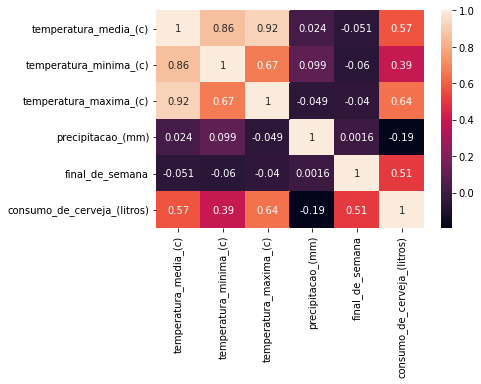

In [ ]:
sns.heatmap(df.corr(),annot=True)

###A segunda mais alta correlação com 'consumo_de_cerveja' é 'Temperatura_Media'. Porém, a correlação entre ela e a outra variável preditora, 'Temperatura_Máxima', é muito alta. Portanto, escolher as duas contribuiria para um overfitting. 
###A próxima variável a ser considerada então seria 'Final_de_Semana' com correlação de 0.51 com o 'Consumo_de_Cerveja'.

###Vamos repetir o procedimento agora considerando também a variável Fim_de_semana:

In [ ]:
x=df[['temperatura_maxima_(c)','final_de_semana']]
y=df[['consumo_de_cerveja_(litros)']]

###Vamos ajustar a melhor reta aos dados:

In [ ]:
lm.fit(x,y)

LinearRegression()

###Prevendo os valores para y segundo nossa reta ajustada para cada x.

In [ ]:
y_hat = lm.predict(x)

###Graficamente, podemos comparar os valores reais com os previstos:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


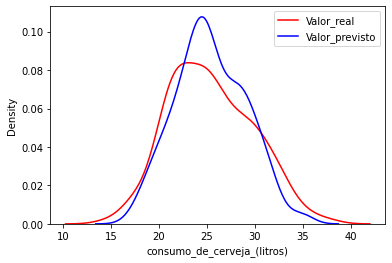

In [ ]:
ax1 = sns.distplot(df['consumo_de_cerveja_(litros)'],hist=False,color='r',label='Valor_real')
sns.distplot(y_hat,hist=False,ax=ax1,color='b',label='Valor_previsto')
plt.legend()
plt.show()

###Aparentemente, o modelo já teve uma melhora significativa em prever os valores. Para confirmar isso, precisamos calcular as métricas:

In [ ]:
print('R2: ', r2_score(y,y_hat))
print('MAE: ', mean_absolute_error(y,y_hat))
print('RMSE: ',np.sqrt(mean_squared_error(y,y_hat)))

R2:  0.6963552106338191
MAE:  2.009239861340462
RMSE:  2.4207794629129045


###Efetivamente, o score R^2 subiu de 0.413027909953363 para 0.6963552106338191. 
###E os erros médios possuem valores menores e mais próximos entre si.

##**Regressão Polinomial**

###Os modelos desenvolvidos anteriormente levaram em consideração um ajuste linear entre as variáveis.
###Uma forma de, possivelmente, melhorar o resultado é permitir que a relação entre as variáveis seja do tipo polinomial.
###Vamos, primeiramente, começar com um polinômio de grau 2:

In [ ]:
pr=PolynomialFeatures(degree=2)

In [ ]:
x_new=pr.fit_transform(x)

In [ ]:
lm.fit(x_new,y)

LinearRegression()

In [ ]:
y_hat=lm.predict(x_new)

###Graficamente:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


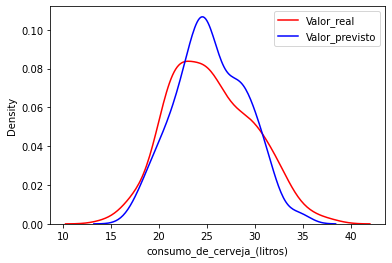

In [ ]:
ax1 = sns.distplot(df['consumo_de_cerveja_(litros)'],hist=False,color='r',label='Valor_real')
sns.distplot(y_hat,hist=False,ax=ax1,color='b',label='Valor_previsto')
plt.legend()
plt.show()

###Métricas:

In [ ]:
print('R2: ', r2_score(y,y_hat))
print('MAE: ', mean_absolute_error(y,y_hat))
print('RMSE: ',np.sqrt(mean_squared_error(y,y_hat)))

R2:  0.6965655124496346
MAE:  2.011544427344538
RMSE:  2.419941012009553


###O score R^2 teve um pequeno aumento de 6963552106338191 para 0.6965655124496346.
###Vejamos para o caso de um polinômio de grau 3:

In [ ]:
pr=PolynomialFeatures(degree=3)
x_new=pr.fit_transform(x)
lm.fit(x_new,y)
y_hat=lm.predict(x_new)

###Graficamente:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


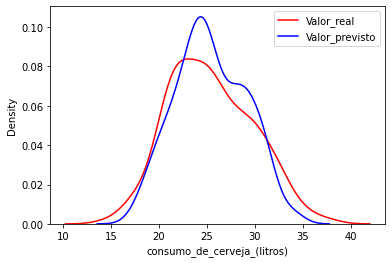

In [ ]:
ax1 = sns.distplot(df['consumo_de_cerveja_(litros)'],hist=False,color='r',label='Valor_real')
sns.distplot(y_hat,hist=False,ax=ax1,color='b',label='Valor_previsto')
plt.legend()
plt.show()

###Métricas:

In [ ]:
print('R2: ', r2_score(y,y_hat))
print('MAE: ', mean_absolute_error(y,y_hat))
print('RMSE: ',np.sqrt(mean_squared_error(y,y_hat)))

R2:  0.6977093803330299
MAE:  2.009628928571805
RMSE:  2.4153754359288957


###Poucas mudanças!
###Vamos tentar, por último, o polinômio de grau 5:

In [ ]:
pr=PolynomialFeatures(degree=5)
x_new=pr.fit_transform(x)
lm.fit(x_new,y)
y_hat=lm.predict(x_new)

###Graficamente:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


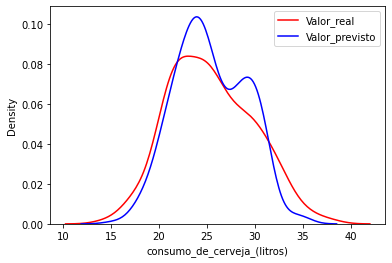

In [ ]:
ax1 = sns.distplot(df['consumo_de_cerveja_(litros)'],hist=False,color='r',label='Valor_real')
sns.distplot(y_hat,hist=False,ax=ax1,color='b',label='Valor_previsto')
plt.legend()
plt.show()

###Métricas:

In [ ]:
print('R2: ', r2_score(y,y_hat))
print('MAE: ', mean_absolute_error(y,y_hat))
print('RMSE: ',np.sqrt(mean_squared_error(y,y_hat)))

R2:  0.7003261358348749
MAE:  1.979978246771198
RMSE:  2.4048984575036987


###A seguir, vamos separar os dados em treino e teste para averiguar qual modelo tem maior acurácia na previsão dos dados.

##**Treino e Teste**

### A ideia aqui é, basicamente:
* Separar os dados em uma parte para "treino" (70%) e outra para "teste" (30%)
* Usar os dados de "treino" para aplicar o modelo de regressão e assim ajustar uma curva para prever novos valores.
* Usar os dados de "teste" para testar o modelo gerado no passo anterior, já que sabemos exatamente o valor alvo desse conjunto de dados. 
* Avaliar o quão corretamente o modelo previu os dados de "teste".



###Definindo minhas variáveis preditoras (independentes) e a variável alvo (dependente):

In [ ]:
X = df[['temperatura_maxima_(c)','final_de_semana']]
Y = df['consumo_de_cerveja_(litros)']

###Separando os dados em 'treino' e 'teste'.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,random_state=42)
#O parâmetro stratify=Y é útil em alguns casos a fim de evitar que os dados não sejam divididos de forma desproporcional.

###Um problema comum de acontecer é não fixar a divisão em 'treino' e 'teste'. Dessa forma, sempre que o comando acima for rodado, diferentes conjuntos de treino e teste serão definidos, mudando os resultados subsequentes.
###Para evitar isso, colocamos o parâmetro 'random_state=42'.

In [ ]:
len(x_train)

255

In [ ]:
len(x_test)

110

###Vamos fazer o 'treino' e 'teste' primeiramente para o modelo de regressão linear.
###Começamos 'treinando' o modelo para ajustar a melhor curva partindo dos dados de treino:

In [ ]:
lm.fit(x_train,y_train)

LinearRegression()

###Agora que o modelo já foi 'treinado', podemos usá-lo para prever a variável dependente y_hat a partir do conjunto de teste.

In [ ]:
y_hat = lm.predict(x_test)

###Nesse momento temos dois conjuntos de dados a serem comparados:

* os reais valores de y, que chamamos de y_test, correspondentes aos x_test;
* os valores previstos y_hat a partir de x_test utilizando o modelo treinado.

###Vamos fazer essa comparação graficamente e através das métricas:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


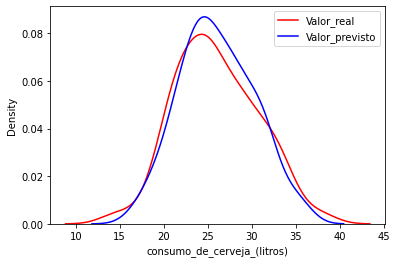

R2:  0.710245724555824
MAE:  2.062380356576396
RMSE:  2.5139920592601306


In [ ]:
ax1 = sns.distplot(y_test,hist=False,color='r',label='Valor_real')
sns.distplot(y_hat,hist=False,ax=ax1,color='b',label='Valor_previsto')
plt.legend()
plt.show()
print('R2: ', r2_score(y_test,y_hat))
print('MAE: ', mean_absolute_error(y_test,y_hat))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_hat)))

###Vamos agora repetir o treino e teste usando a regressão polinomial de grau 2:

In [ ]:
pr=PolynomialFeatures(degree=2)
x_new_train=pr.fit_transform(x_train)
lm.fit(x_new_train,y_train)
x_new_test=pr.fit_transform(x_test)
y_hat=lm.predict(x_new_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


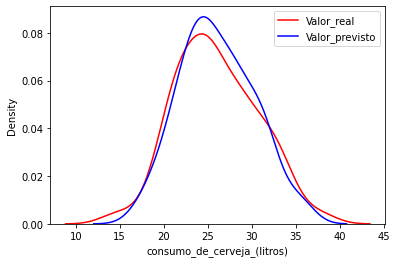

R2:  0.7083390523894775
MAE:  2.062551366842364
RMSE:  2.5222499168419086


In [ ]:
ax1 = sns.distplot(y_test,hist=False,color='r',label='Valor_real')
sns.distplot(y_hat,hist=False,ax=ax1,color='b',label='Valor_previsto')
plt.legend()
plt.show()
print('R2: ', r2_score(y_test,y_hat))
print('MAE: ', mean_absolute_error(y_test,y_hat))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_hat)))

###Treino e teste do modelo de regressão polinomial de grau 3:

In [ ]:
pr=PolynomialFeatures(degree=3)
x_new_train=pr.fit_transform(x_train)
lm.fit(x_new_train,y_train)
x_new_test=pr.fit_transform(x_test)
y_hat=lm.predict(x_new_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


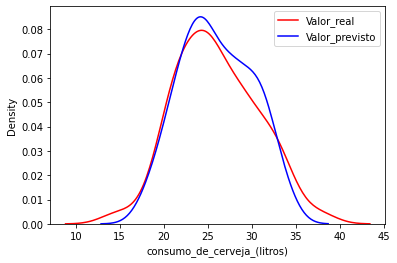

R2:  0.7086487156725013
MAE:  2.0673362366976793
RMSE:  2.5209105952414514


In [ ]:
ax1 = sns.distplot(y_test,hist=False,color='r',label='Valor_real')
sns.distplot(y_hat,hist=False,ax=ax1,color='b',label='Valor_previsto')
plt.legend()
plt.show()
print('R2: ', r2_score(y_test,y_hat))
print('MAE: ', mean_absolute_error(y_test,y_hat))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_hat)))

###Treino e teste do modelo de regressão polinomial de grau 5:

In [ ]:
pr=PolynomialFeatures(degree=5)
x_new_train=pr.fit_transform(x_train)
lm.fit(x_new_train,y_train)
x_new_test=pr.fit_transform(x_test)
y_hat=lm.predict(x_new_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


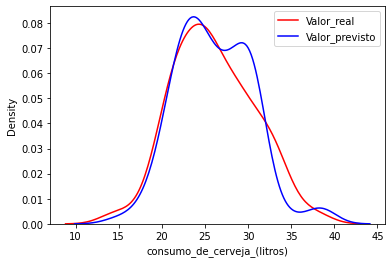

R2:  0.6870182182611428
MAE:  2.093253300970681
RMSE:  2.6128140600883887


In [ ]:
ax1 = sns.distplot(y_test,hist=False,color='r',label='Valor_real')
sns.distplot(y_hat,hist=False,ax=ax1,color='b',label='Valor_previsto')
plt.legend()
plt.show()
print('R2: ', r2_score(y_test,y_hat))
print('MAE: ', mean_absolute_error(y_test,y_hat))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_hat)))

###Treino e teste do modelo de regressão polinomial de grau 8:

In [ ]:
pr=PolynomialFeatures(degree=8)
x_new_train=pr.fit_transform(x_train)
lm.fit(x_new_train,y_train)
x_new_test=pr.fit_transform(x_test)
y_hat=lm.predict(x_new_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


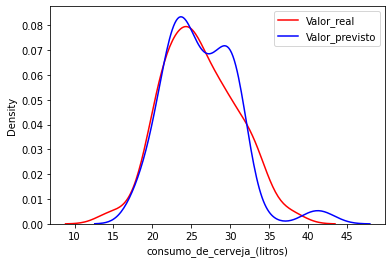

R2:  0.6371597433737461
MAE:  2.199083645273898
RMSE:  2.813239508130287


In [ ]:
ax1 = sns.distplot(y_test,hist=False,color='r',label='Valor_real')
sns.distplot(y_hat,hist=False,ax=ax1,color='b',label='Valor_previsto')
plt.legend()
plt.show()
print('R2: ', r2_score(y_test,y_hat))
print('MAE: ', mean_absolute_error(y_test,y_hat))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_hat)))

###A partir dos testes feitos, o modelo com métricas mais favoráveis é o de regressão linear.

###Vale notar que quando os modelos foram ajustados com o conjunto completo de dados, o modelo de regressão linear polinomial apresentaram scores melhores.

##**Previsão para 2022**

###Vamos utilizar o modelo obtido através da regressão linear para prever os valores de consumo de cerveja em datas que não estão no dataset.

In [ ]:
x=df[['temperatura_maxima_(c)','final_de_semana']]
y=df[['consumo_de_cerveja_(litros)']]
lm.fit(x,y)
y_hat = lm.predict(x)
print('R2: ', r2_score(y,y_hat))
print('MAE: ', mean_absolute_error(y,y_hat))
print('RMSE: ',np.sqrt(mean_squared_error(y,y_hat)))

R2:  0.6963552106338191
MAE:  2.009239861340462
RMSE:  2.4207794629129045


###Adicionando as previsões ao dataset original:

In [ ]:
df['Consumo_previsto']=y_hat

###Vamos agora usar o nosso modelo para prever o consumo de cerveja em outros dias.
###Para isso, primeiro vamos trazer abaixo os dados de temperatura em São Paulo dos dias de interesse:

In [ ]:
carnaval_2022 = pd.DataFrame({'data':['2022-02-26','2022-02-27','2022-02-28','2022-03-01','2022-03-02'],
                              'temperatura_media_(c)':[23.9,24.1,26.2,25.6,24.7],'temperatura_minima_(c)':[19.1,19.8,20.6,23.2,20],
                              'temperatura_maxima_(c)':[32.2,31.4,32.9,31.6,31.7],'precipitacao_(mm)':[0,0,0,0,7.2],'final_de_semana':[1,1,0,0,0]})

#Dados obtidos do INMET (Instituto Nacional de Meteorologia). https://portal.inmet.gov.br/
carnaval_2022

,data,temperatura_media_(c),temperatura_minima_(c),temperatura_maxima_(c),precipitacao_(mm),final_de_semana
0,2022-02-26,23.9,19.1,32.2,0.0,1
1,2022-02-27,24.1,19.8,31.4,0.0,1
2,2022-02-28,26.2,20.6,32.9,0.0,0
3,2022-03-01,25.6,23.2,31.6,0.0,0
4,2022-03-02,24.7,20.0,31.7,7.2,0


In [ ]:
x_2022 = carnaval_2022[['temperatura_maxima_(c)','final_de_semana']]

In [ ]:
y_hat_2022 = lm.predict(x_2022)

In [ ]:
carnaval_2022['consumo']=y_hat_2022

In [ ]:
carnaval_2022

,data,temperatura_media_(c),temperatura_minima_(c),temperatura_maxima_(c),precipitacao_(mm),final_de_semana,consumo
0,2022-02-26,23.9,19.1,32.2,0.0,1,32.890515
1,2022-02-27,24.1,19.8,31.4,0.0,1,32.349156
2,2022-02-28,26.2,20.6,32.9,0.0,0,28.179491
3,2022-03-01,25.6,23.2,31.6,0.0,0,27.299783
4,2022-03-02,24.7,20.0,31.7,7.2,0,27.367453


#**Conclusão**

##Assim, de acordo com as previsões feitas pelo modelo, o melhor dia para vender cerveja seria no sábado de carnaval (2022-02-26). É interessante notar que, a temperatura máxima e a temperatura média do dia 28 (segunda-feira) são mais altas do que do dia 26. Porém, o fato de ser final de semana teve papel decisivo no consumo previsto.